<a href="https://colab.research.google.com/github/tenafrangelos/ML/blob/main/linear_regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

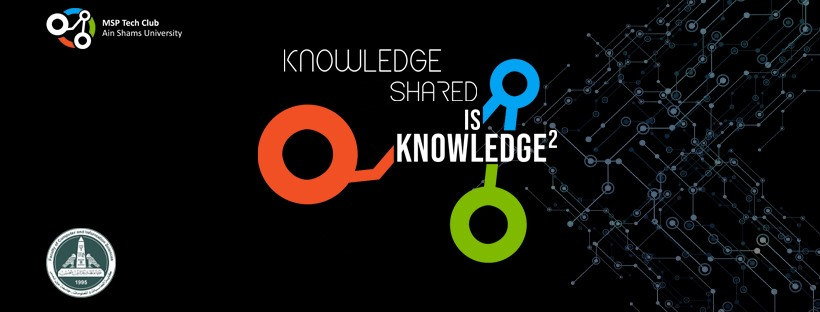

# Linear Regression with one variable

### First of all we need to import the libraries we need in the code

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### After that we need to read our data using Pandas

In [ ]:
dataFrame = pd.read_csv("/content/Example2.csv - Example2.csv.csv")
dataFrame

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.1932,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


### lets view how our data is distributed by plotting it into a graph using matplotlib

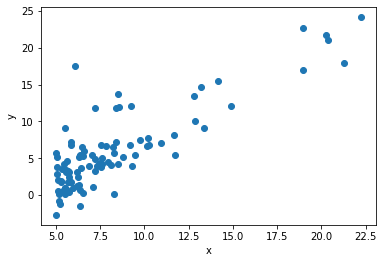

In [ ]:
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(dataFrame.x,dataFrame.y)
plt.show()

### let's convert the data we are going to use into vectors ( or arrays ) 
so we will use the slicing and indexing to specify which column do we want to be X and which is Y

In [ ]:
# N.B [:] this means that we want all the rows (content)
# so by [:,0] i meant that i want all the rows in the first column which is indexed as 0
x = dataFrame.iloc[:,0].to_numpy()
m = len(x)
print(x)
y = dataFrame.iloc[:,1].to_numpy()
print(y)

[ 6.1101  5.5277  8.5186  7.1932  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.1962  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

## Now Let's Build Our Model 

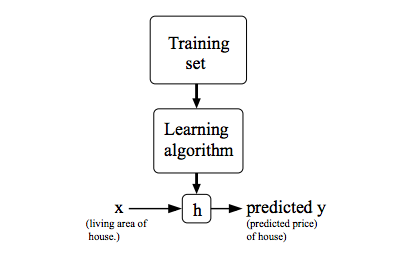

### Hypothesis
#### Hypothesis is the main function of the line of predictions 
#### $$h(x) = b + w * x$$
where<br>
      $b$ : is the bias ( diffrence between the origin point and the point where the line started at the y axis )<br>
      $w$ : is the weight of the feature ( or the slope )<br>
      $x$ : is the input feature <br>

In [ ]:
def hypothesis(w,b,x):
    return w*x + b

## Cost Function
#### it's the function which calculate the diffrence between our line of hypothesis and the actual points of the dataset
#### this let us figure out how to fit the best possible straight line to our data by reducing the output of the cost function as much as possible
$$ J(w) = \frac{1}{2m} \sum_{i=1}^m \left( h(x^{(i)}) - y^{(i)}\right)^2$$
where<br>
$m$ : is the total number of the rows in the dataset<br>
$h$ : is our hypothesis function<br>
$y$ : is the real output in our dataset<br>
please note that $i$ is not a power it is just an index<br>
<br>
### OUR MAIN GOAL IS TO MINIMIZE THE COST FUNCTION 

In [ ]:
def cost_function(w,b,x,y):
    j = np.sum(np.square(hypothesis(w,b,x)-y))/(2*m)
    return j

## Gradient Decent
### so we knew before that the cost function let us know whether our hypothesis line fits the dataset in a good way or not, but it didn't let us know which way should we take to improve our model ( or line of hypothesis ), should we increase the weight (or the bias) or we should decrease it ??
### So just don't Panic this is the main rule of the Gradient Decent function is to improve ( or optimize ) your weight and bias, to get closer to the optimal line by changing the values of the weight  and bias
$$ w := w - α * \frac{d(j)}{dw}$$
where : <br>
$α$ : is the learning rate (constant Value we assign)<br>
$\frac{d(j)}{dw}$ : is the first derivative of the cost function $j(w)$ <br>
$w$ : is the weight <br>
### since 
$$ \frac{d(j)}{dw} = \frac{1}{m} \sum_{i=1}^m \left( h(x^{(i)}) - y^{(i)}\right)*x$$
### so our Gradient Decent will look like this
$$ w := w - α * (\frac{1}{m} \sum_{i=1}^m \left( h(x^{(i)}) - y^{(i)}\right)*x)$$
### now it is easier to imagine how to write it in the code 
note that it is multiplied by $x$ because $h(x) = b + w*x$

In [ ]:
def Gradient_Decent(w,b,x,y,lr):
    slope = np.sum((hypothesis(w,b,x)-y)*x)/(m)
    w = w - lr*slope
    # we will make the same for the bias by getting the first derivative of the cost function with respect to b
    db = np.sum((hypothesis(w,b,x)-y))/(m)
    b = b - lr*db
    return w,b

then we will assign our weight and bias to any random value like 0 for an example

In [ ]:
w = 0
b = 0

now lets assign our learning rate and try our mode <br>
we will change our weight and bias by optimizing it by the gradient decent and view the output of our cost function

### First Iteration

29.149444297326134


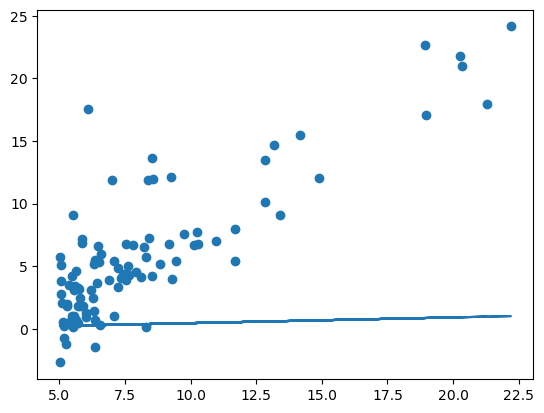

In [ ]:
lr = 0.0007
w,b = Gradient_Decent(w,b,x,y,lr)
h = hypothesis(w,b,x)
j = cost_function(w,b,x,y)
print(j)
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

### Second Iteration
As you can see our cost function out is reduced and our line started be better

26.552748826206766


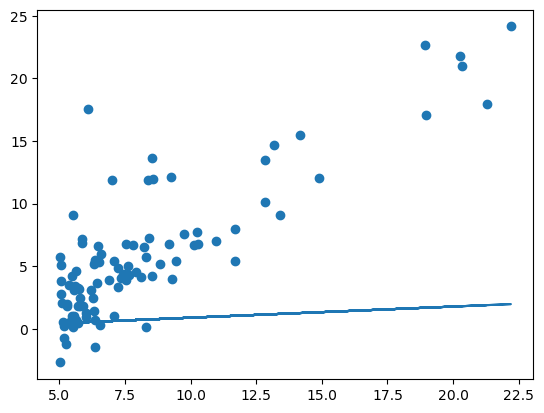

In [ ]:
w,b = Gradient_Decent(w,b,x,y,lr)
h = hypothesis(w,b,x)
j = cost_function(w,b,x,y)
print(j)
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

### After many iterations You can notice the big diffrence and how our line fitted the data in better way

4.476971375990662


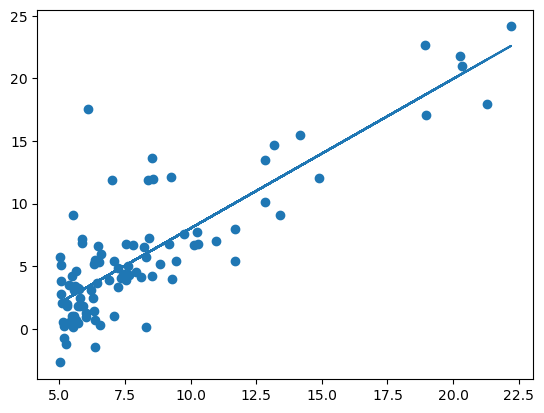

In [ ]:
iterations = 100000
for i in range(iterations):
    w,b = Gradient_Decent(w,b,x,y,lr)
h = hypothesis(w,b,x)
j = cost_function(w,b,x,y)
print(j)
plt.scatter(x,y)
plt.plot(x,h)
plt.show()

___

Made By : Abdelrahman Mohamed <br>
Machine Learning Department, MSP ASU<br>
2021/22

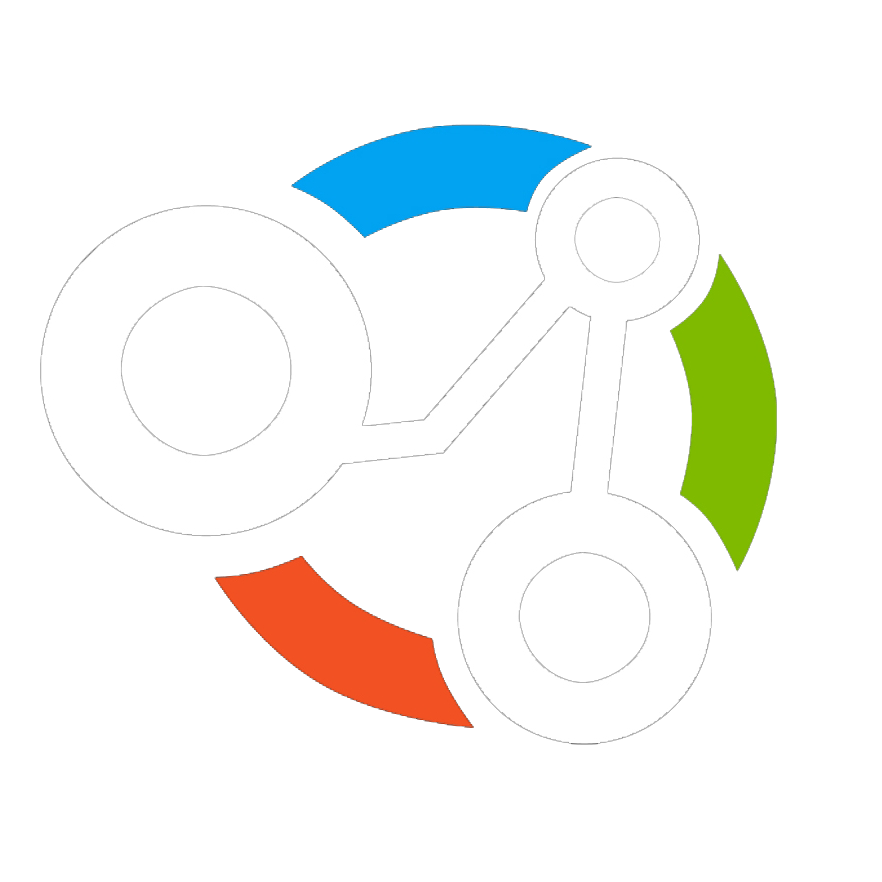